#### SARSAMAX

In [159]:
from graphics import *
import random
import numpy as np
from math import sqrt
from math import log10
import matplotlib.pyplot as plt
import queue
import time

#### Create necessary function for the execution of Eligibility Traces algorithm

In [2]:
class Node:
    def __init__(self, x=None, y=None, z=None):
        self.x = x
        self.y = y
        self.z = z

In [3]:
class Queue:
    #create fixed size queue
    def __init__(self,maxsize = 0):
        self.maxsize = maxsize
        self.queue = []
        self.front = 0
        self.rear = 0
    
    #check queue is empty
    def empty(self):
        if self.front == self.rear:
            return True
        else:
            return False
    
    #check queue is full
    def full(self):
        if self.front > self.rear  and self.front == (self.rear + 1):
            return True
        elif self.front == 0 and self.rear == (self.maxsize-1):
            return True
        else :
            return False
    
    #Enqueue operation
    def enqueue(self,data):
        if not self.full():
            if len(self.queue) == self.maxsize:
                self.queue[self.rear] = data
                self.rear = (self.rear + 1) % self.maxsize
            else:
                self.queue.append(data)
                self.rear = (self.rear + 1) % self.maxsize
    
    #Dequeue operation
    def dequeue(self):
        if not self.empty():
            value = self.queue[self.front]
            self.front = (self.front + 1) % self.maxsize
            return value
    
    #Peak operation view all the element
    def peak(self):
        if self.empty():
            return []
        
        if self.rear > self.front:
            value = []
            for i in range(self.front,self.rear):
                value.append(self.queue[i])
            
            return value
        else :
            value = []
            for i in range(self.front,self.maxsize):
                value.append(self.queue[i])
            
            for i in range(0,self.rear):
                value.append(self.queue[i])
            
            return value
        
    

#### create 5x5 Grid world

In [4]:
win = GraphWin("My Window", 600,600)
win.setBackground(color_rgb(255,255,255))

In [5]:
def line(x1,y1,x2,y2):
    """
    create a line between pt(x1,y1) and pt(x2,y2) and return it
    """
    ln = Line(Point(x1,y1),Point(x2,y2))
    ln.setOutline(color_rgb(0,0,0))
    ln.setWidth(2)
    
    return ln

In [6]:
#border lines
border1 = line(50,50,550,50)
border1.draw(win)

border2 = line(550,50,550,550)
border2.draw(win)

border3 = line(50,550,550,550)
border3.draw(win)

border4 = line(50,50,50,550)
border4.draw(win)

#lines horizontal
ln1 = line(50,150,550,150)
ln1.draw(win)

ln2 = line(50,250,550,250)
ln2.draw(win)

ln3 = line(50,350,550,350)
ln3.draw(win)

ln4 = line(50,450,550,450)
ln4.draw(win)

#lines vertical

lnv1 = line(150,50,150,550)
lnv1.draw(win)

lnv2 = line(250,50,250,550)
lnv2.draw(win)

lnv3 = line(350,50,350,550)
lnv3.draw(win)

lnv4 = line(450,50,450,550)
lnv4.draw(win)

#create goal, obstacle and hole

rect_goal = Rectangle(Point(450,50), Point(550,150))
rect_goal.setFill(color_rgb(0,255,0))
rect_goal.draw(win)

rect_hole = Rectangle(Point(450,150), Point(550,250))
rect_hole.setFill(color_rgb(255,0,0))
rect_hole.draw(win)

rect_obs1 = Rectangle(Point(150,350), Point(250,450))
rect_obs1.setFill(color_rgb(0,0,0))
rect_obs1.draw(win)

rect_obs2 = Rectangle(Point(150,250), Point(250,350))
rect_obs2.setFill(color_rgb(0,0,0))
rect_obs2.draw(win)

Rectangle(Point(150.0, 250.0), Point(250.0, 350.0))

#### Create agent look like circle

In [7]:
agent = Circle(Point(100,500), 25)
agent.setFill(color_rgb(0,0,255))
agent.draw(win)

Circle(Point(100.0, 500.0), 25)

In [8]:
def up(agent):
    val = agent.getCenter()
    
    if (val.getY()) == 100 or (val.getY() == 500 and val.getX() == 200) :
        pass
    else :
        agent.move(0,-100)
        
    
def down(agent):
    val = agent.getCenter()
    
    if val.getY() == 500 or (val.getX() == 200 and val.getY() == 200):
        pass
    else :
        agent.move(0,100)

def right(agent):
    val = agent.getCenter()
    
    if val.getX() == 500 or (val.getX() == 100 and (val.getY() == 300 or val.getY() == 400)):
        pass
    else :
        agent.move(100,0)

def left(agent):
    val = agent.getCenter()
    
    if val.getX() == 100 or (val.getX() == 300 and (val.getY() == 300 or val.getY() == 400)):
        pass
    else:
        agent.move(-100,0)
        
def action(agent,val):
    if val == 0:
        up(agent)
    elif val == 1:
        down(agent)
    elif val == 2:
        right(agent)
    else :
        left(agent)

#### Reward for agent in the each state

In [9]:
reward = np.array([[-1,-1,-1,-1,-1],
                   [-1,-20,-1,-1,-1],
                   [-1,-20,-1,-1,-1],
                   [-1,-1,-1,-1,-100],
                   [-1,-1,-1,-1,100]])

In [10]:
def rewards(agent):
    val = agent.getCenter()
    i = int(val.getX() / 100) - 1
    j = int((500 - val.getY()) / 100) 
    
    
    return reward[j][i]

def observation(agent):
    val = agent.getCenter()
    i = int(val.getX() / 100) - 1
    j = int((500 - val.getY()) / 100) 
    
    return [i,j]

def env_close():
    win.close()

def reset(agent):
    agent.move(-400,400)

def set_agent(agent,obs):
    pos = agent.getCenter()
    
    pos = [pos.getX(), pos.getY()]
    
    refer_pos = [(obs[0]+1) * 100, (500 - (obs[1]*100))]
    
    
    agent.move(refer_pos[0]-pos[0], refer_pos[1] - pos[1])

#### Create the value function and policy

In [11]:
Q = np.zeros([5,5,4])
E = np.zeros([5,5,4])

In [12]:
Q[4,4] = [100.,100.,100.,100.]

#### Declare the variable

In [13]:
episode = 300
max_episode_length = 150
learning_rate = .01
discount_factor = 0.9
lambda_return = 0.7
episode_without_ET = []

#### Q Learning using Eligibility traces

In [166]:
Q = np.zeros([5,5,4])
E = np.zeros([5,5,4])
Q[4,4] = [100.,100.,100.,100.]
episode_with_ET = []

In [167]:
start_time = time.time()
for j in range(episode):  
    epsilon = 1 / (sqrt(j)+1)
    
    S = observation(agent)
    A = np.argmax(Q[S[0],S[1]])
    
    for i in range(max_episode_length):
        action(agent,A)
        
        R = rewards(agent)
        
        S_new = observation(agent)
        
        p = random.uniform(0,1)
        
        if p > epsilon:
            A_new = np.argmax(Q[S_new[0],S_new[1]])
        else :
            A_new = np.random.choice([0,1,2,3])
        
        #add probability to each action
        if A_new == 0:
            A_new = np.random.choice([0,1,2,3],p=[0.8,0,0.1,0.1])
        elif A_new == 1:
            A_new = np.random.choice([0,1,2,3],p=[0,0.8,0.1,0.1])
        elif A_new == 2:
            A_new = np.random.choice([0,1,2,3],p=[0.1,0.1,0.8,0])
        elif A_new == 3:
            A_new = np.random.choice([0,1,2,3],p=[0.1,0.1,0, 0.8])
            
       
        #temporal difference learning using eligiblity traces
        
        TD_error = R + (discount_factor * np.max(Q[S_new[0],S_new[1]])) - Q[S[0],S[1],A]
        E[S[0],S[1],A] = E[S[0],S[1],A] + 1
        
        for x in range(5):
            for y in range(5):
                for z in range(4):
                    Q[x,y,z] = Q[x,y,z] + (learning_rate * TD_error * E[x,y,z])
                    E[x,y,z] = discount_factor * lambda_return * E[x,y,z] 
 
        S = S_new
        A = A_new
        
        if (S[0] == 4) and (S[1] == 4):
            reset(agent)
            S = observation(agent)
            A = np.argmax(Q[S[0],S[1]])
            episode_with_ET.append(i)
            E = np.zeros([5,5,4])
            break
            
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.914014577865601 seconds ---


#### How much episode takes to win the game with Eligibility Trace

In [168]:
episode= 300
max_episode_length = 150
Q = np.zeros([5,5,4])
Q[4,4] = [100.,100.,100.,100.]
episode_with_diff_ET = []
size = int(-2/log10(lambda_return))

In [169]:
start_time = time.time()
for j in range(episode):  
    epsilon = 1 / (sqrt(j)+1)
    
    set_agent(agent,[0,0])
    S = observation(agent)
    A = np.argmax(Q[S[0],S[1]])
    
    Backview = Queue(size)
    
    for i in range(max_episode_length):
        action(agent,A)
        
        R = rewards(agent)
        
        S_new = observation(agent)
        
        p = random.uniform(0,1)
        
        if p > epsilon:
            A_new = np.argmax(Q[S_new[0],S_new[1]])
        else :
            A_new = np.random.choice([0,1,2,3])
        
        #add probability to each action
        if A_new == 0:
            A_new = np.random.choice([0,1,2,3],p=[0.8,0,0.1,0.1])
        elif A_new == 1:
            A_new = np.random.choice([0,1,2,3],p=[0,0.8,0.1,0.1])
        elif A_new == 2:
            A_new = np.random.choice([0,1,2,3],p=[0.1,0.1,0.8,0])
        elif A_new == 3:
            A_new = np.random.choice([0,1,2,3],p=[0.1,0.1,0, 0.8])
            
       
        #temporal difference learning using eligiblity traces
        
        TD_error = R + (discount_factor * np.max(Q[S_new[0],S_new[1]])) - Q[S[0],S[1],A]
        
        if Backview.full():
            Backview.dequeue()
            Backview.enqueue(Node(S[0],S[1],A))
        else :
            Backview.enqueue(Node(S[0],S[1],A))
            
        Transit = Backview.peak()
        
        Transit_length = len(Transit)
        for k in range(len(Transit)):
            s1 = Transit[k].x
            s2 = Transit[k].y
            a  = Transit[k].z
            if Transit_length == (size -1):
                Q[s1,s2,a] = Q[s1,s2,a] + ((learning_rate * TD_error)*((lambda_return)**(size-k-2)))
            else :
                Q[s1,s2,a] = Q[s1,s2,a] + ((learning_rate * TD_error)*((lambda_return)**(Transit_length-k-1)))
       
        
        S = S_new
        A = A_new
        if (S[0] == 4) and (S[1] == 4):
            set_agent(agent,[0,0])
            S = observation(agent)
            A = np.argmax(Q[S[0],S[1]])
            episode_with_diff_ET.append(i)
            break  

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.6722137928009033 seconds ---


#### Eligibility Traces using old algorithm

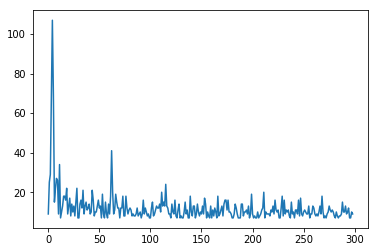

In [170]:
plt.plot(episode_with_ET)
plt.show()

#### Eligibility Trace using New algorithm

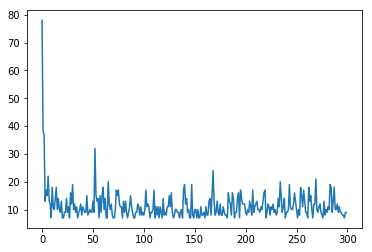

In [171]:
plt.plot(episode_with_diff_ET)
plt.show()

#### Time difference between two algorithm is old one takes 4.9s while New one takes 1.6s

#### After 300 episode with maximum150 step in each episode using SARSAMAX and Eligibility Trace

| right| right| right| right|  GOAL  |
|------|------|------|------|--------|
| right| right| right|  up  |   up   |
|------|------|------|------|--------|
|  up  |      |  up  |  up  |  left  |
|------|------|------|------|--------|
|  up  |      |  up  | left |  Down  |
|------|------|------|------|--------|
|  up  | right|  up  | left |  left  |

In [158]:
win.close()

#### Compare both SARSA with Eligibility Trace and SARSA with Eligibility Traces implemented with new algorithm, both works similar.